# Imodels

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
# Load the saved Random Forest model
model_folder = "../../2_Modeling_Phase/Saved-Models/"
model_filename = "Farm-Flow_XGBoost.joblib"
model_path = model_folder + model_filename

model = joblib.load(model_path)

Load Train Dataset

In [3]:
df_train = pd.read_csv("../../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.236304,-0.662387,-0.577140,-0.443123,-0.277741,-0.268577,-0.273647,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,0.490111,0.504662,0.498222,0.728588,-0.643844,0.278456,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,Port_Scanning,1
2,-0.454205,-0.662387,-0.577140,-0.443123,-0.277918,-0.268577,-0.273736,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276874,-0.267504,-0.272675,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.672105,-0.457813,-0.577140,-0.443123,-0.277823,-0.268460,-0.273629,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.670339,-0.529202,-0.741186,-0.418623,MQTT_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47341,-0.454205,-0.457813,-0.577140,-0.443123,-0.276776,-0.267991,-0.272869,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
47342,-0.454205,-0.662387,-0.577140,-0.443123,-0.277509,-0.268577,-0.273530,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
47343,2.160596,1.997080,2.285759,2.444445,-0.276943,-0.267646,-0.272781,0.576960,1.928668,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.275202,0.312477,-0.072391,0.630330,Normal,0
47344,1.288996,1.383357,1.713179,0.711904,-0.265775,-0.256330,-0.261520,0.728588,2.330623,1.129475,...,-0.250326,0.400251,-0.238680,-0.346375,1.485493,1.556699,0.470671,0.378581,Normal,0


In [6]:
display(df_test)

,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,fwd_header_size_min,...,flow_pkts_payload.max,flow_pkts_payload.tot,flow_pkts_payload.avg,flow_pkts_payload.std,fwd_subflow_pkts,bwd_subflow_pkts,fwd_subflow_bytes,bwd_subflow_bytes,traffic,is_attack
0,-0.672105,-0.457813,-0.577140,-0.443123,-0.276940,-0.267571,-0.272742,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
1,-0.672105,-0.457813,-0.577140,-0.443123,-0.277181,-0.267813,-0.272983,0.728588,-0.684039,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.419418,-0.741186,-0.418623,MQTT_Flood,1
2,-0.454205,-0.457813,-0.577140,-0.443123,-0.276909,-0.268058,-0.272969,-0.332802,-0.483062,-0.147053,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.329944,-0.419418,-0.741186,-0.418623,TCP_Flood,1
3,2.378496,2.406229,2.285759,2.444445,-0.276907,-0.267537,-0.272708,0.728588,2.129645,-0.147053,...,-0.240860,1.678331,-0.105550,-0.268638,2.620142,2.654541,1.265201,2.728235,Normal,0
4,-0.454205,-0.253238,-0.004560,-0.443123,-0.276892,-0.267522,-0.272693,0.728588,-0.241889,1.129475,...,-0.477522,-0.635539,-0.408378,-0.455263,-0.329944,-0.199849,-0.596727,-0.418623,HTTP_Flood,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15778,1.942696,2.201655,2.285759,2.444445,-0.277003,-0.267561,-0.272768,0.891878,1.727690,-0.147053,...,-0.240860,1.678331,-0.054762,-0.267306,0.691239,0.897993,0.262007,1.154806,Arp_Spoofing,1
15779,2.160596,2.201655,2.285759,2.444445,-0.276991,-0.267622,-0.272793,0.728588,1.928668,-0.147053,...,-0.240860,1.678331,-0.072901,-0.267431,2.393212,2.434972,1.265201,2.728235,Normal,0
15780,-0.236304,-0.662387,-0.577140,-0.443123,-0.277906,-0.268577,-0.273730,-1.394192,-0.643844,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1
15781,-0.454205,-0.662387,-0.577140,-0.443123,-0.277687,-0.268577,-0.273620,-1.394192,-0.724235,-1.423582,...,-0.562720,-0.744570,-0.562649,-0.557806,-0.556874,-0.638986,-0.741186,-0.418623,UDP_Flood,1


-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred)
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

Row to explain

In [17]:
idx = 0

---
## Imodels

### How it works
Modern machine-learning models are increasingly complex, often making them difficult to interpret. This package provides a simple interface for fitting and using state-of-the-art interpretable models, all compatible with scikit-learn. These models can often replace black-box models (e.g. random forests) with simpler models (e.g. rule lists) while improving interpretability and computational efficiency, all without sacrificing predictive accuracy! Simply import a classifier or regressor and use the fit and predict methods, same as standard scikit-learn models.

### How it applys
Library to compare models

### Repository:
- https://github.com/csinva/imodels

### Paper:
- https://joss.theoj.org/papers/10.21105/joss.03192

In [18]:
#pip install imodels

In [19]:
from imodels import HSTreeClassifierCV

In [20]:
immodel = HSTreeClassifierCV(max_leaf_nodes=4)  # initialize a tree model and specify only 4 leaf nodes
immodel.fit(X_train, y_train, feature_names=feature_names)   # fit model
preds = immodel.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)

In [21]:
print(immodel) # print the model

> ------------------------------
> Decision Tree with Hierarchical Shrinkage
> 	Prediction is made by looking at the value in the appropriate leaf of the tree
> ------------------------------
|--- feature_29 <= -0.07
|   |--- feature_4 <= -0.12
|   |   |--- weights: [0.00, 1.00] class: 1.0
|   |--- feature_4 >  -0.12
|   |   |--- feature_7 <= -0.16
|   |   |   |--- weights: [0.70, 0.30] class: 0.0
|   |   |--- feature_7 >  -0.16
|   |   |   |--- weights: [0.02, 0.98] class: 1.0
|--- feature_29 >  -0.07
|   |--- weights: [0.84, 0.16] class: 0.0



Error Detection

In [22]:
import imodels
from sklearn.ensemble import RandomForestClassifier

In [23]:
model, feature_names = imodels.explain_classification_errors(X_test, model.predict(X_test), y_test,
                                                             feature_names=feature_names,
                                                             classifier=RandomForestClassifier(max_depth=3))

RandomForestClassifier(max_depth=3)


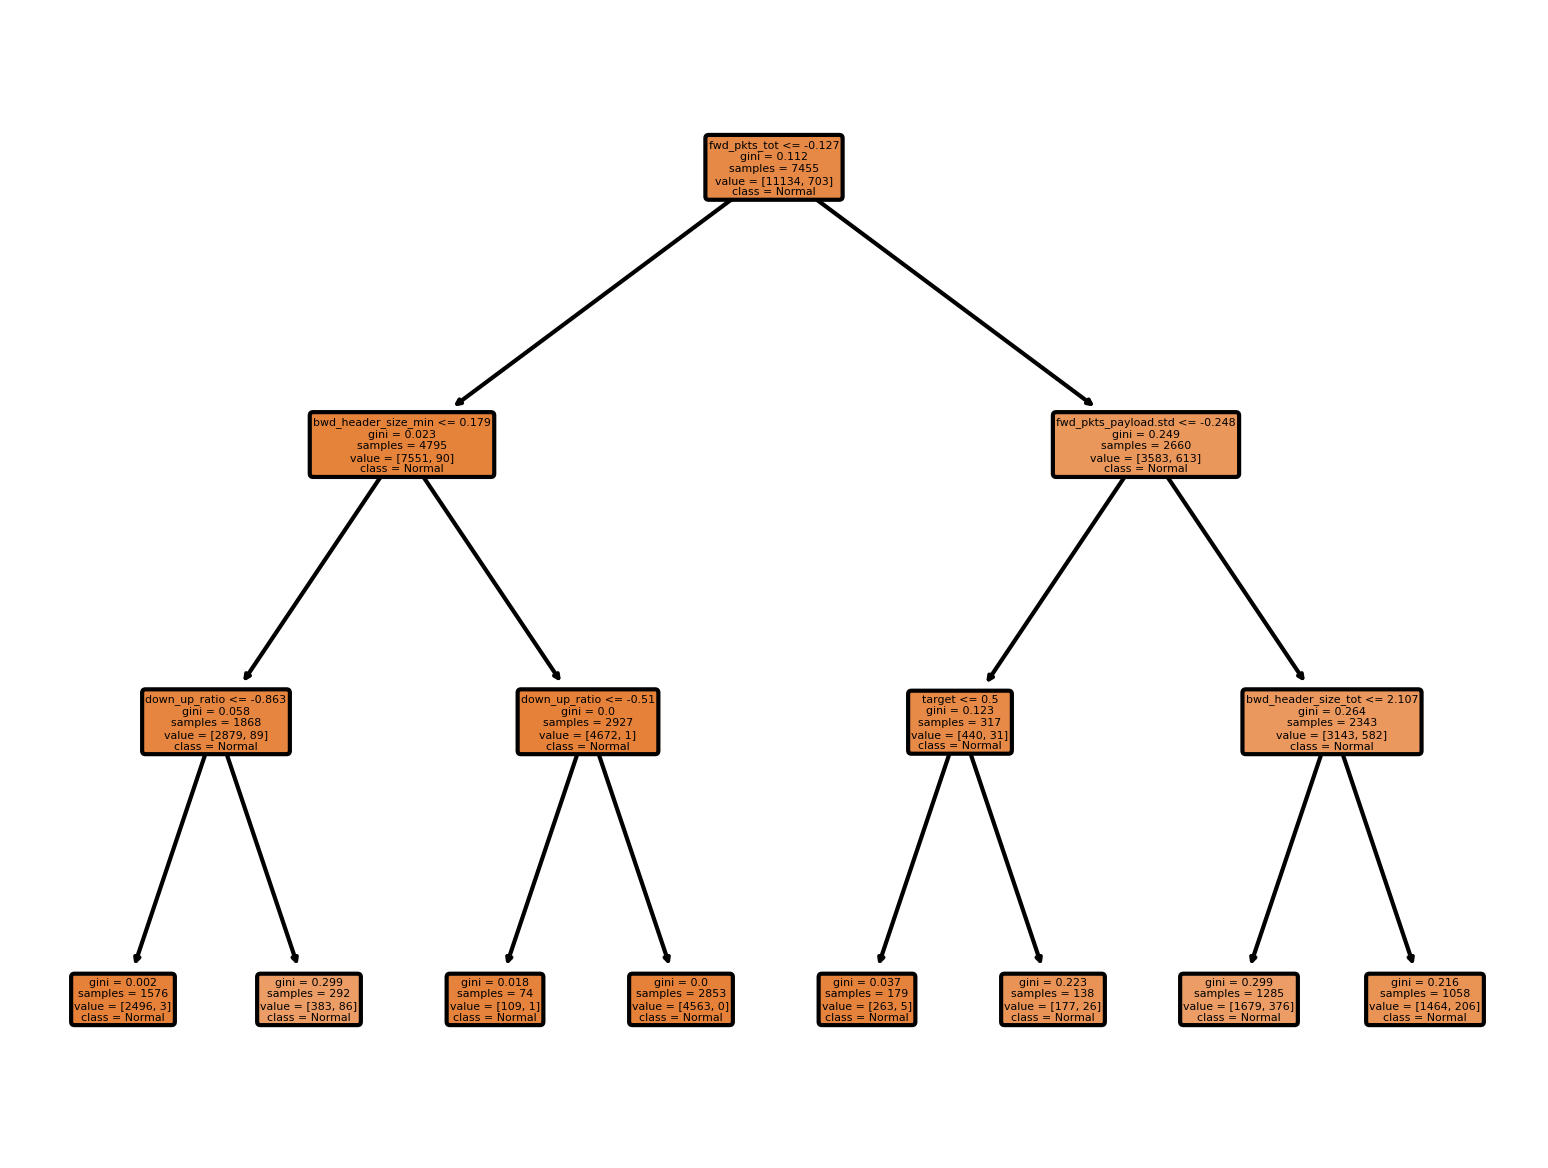

In [24]:
from sklearn.tree import plot_tree

tree_to_plot = model.estimators_[0]

# Convert the Pandas Index to a list
feature_names_list = feature_names.tolist()

plt.figure(dpi=300)
plot_tree(tree_to_plot, feature_names=feature_names_list, filled=True, rounded=True, class_names=class_names)
plt.show()

Figs Classifier

In [25]:
from imodels import FIGSClassifier

In [26]:
model_figs = FIGSClassifier(max_rules=7, max_trees=3)

In [27]:
print(len(feature_names))
print(X_train.shape[1])

34
33


In [28]:
model_figs.fit(X_train, y_train, feature_names=feature_names.drop('target'))

FIGSClassifier(max_rules=7, max_trees=3)

In [29]:
print(model_figs)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
fwd_subflow_pkts <= -0.075 (Tree #0 root)
	fwd_pkts_per_sec <= -0.121 (split)
		Val: 0.998 (leaf)
		down_up_ratio <= -0.156 (split)
			Val: 0.298 (leaf)
			fwd_data_pkts_tot <= -0.148 (split)
				Val: 0.991 (leaf)
				Val: 0.091 (leaf)
	fwd_data_pkts_tot <= -0.148 (split)
		Val: 1.000 (leaf)
		fwd_pkts_payload.tot <= 0.368 (split)
			Val: 0.929 (leaf)
			fwd_pkts_payload.avg <= 0.755 (split)
				Val: 0.144 (leaf)
				Val: 1.000 (leaf)



In [30]:
print(model_figs.print_tree(X_train, y_train))

------------
fwd_subflow_pkts <= -0.075 24704/35509 (69.57%)
	fwd_pkts_per_sec <= -0.121 22779/23517 (96.86%)
		ΔRisk = 1.00 20468/20515 (99.77%)
		down_up_ratio <= -0.156 2311/3002 (76.98%)
			ΔRisk = 0.30 277/929 (29.82%)
			fwd_data_pkts_tot <= -0.148 2034/2073 (98.12%)
				ΔRisk = 0.99 2032/2051 (99.07%)
				ΔRisk = 0.09 2/22 (9.09%)
	fwd_data_pkts_tot <= -0.148 1925/11992 (16.05%)
		ΔRisk = 1.00 150/150 (100.0%)
		fwd_pkts_payload.tot <= 0.368 1775/11842 (14.99%)
			ΔRisk = 0.93 65/70 (92.86%)
			fwd_pkts_payload.avg <= 0.755 1710/11772 (14.53%)
				ΔRisk = 0.14 1693/11755 (14.4%)
				ΔRisk = 1.00 17/17 (100.0%)



Gini Importance

In [31]:
dfp_importance = pd.DataFrame({'feat_names': feature_names})
dfp_importance['feature'] = dfp_importance.index
dfp_importance_gini = pd.DataFrame({'importance_gini': model_figs.feature_importances_})
dfp_importance_gini['feature'] = dfp_importance_gini.index
dfp_importance_gini['importance_gini_pct'] = dfp_importance_gini['importance_gini'].rank(pct=True)
dfp_importance = pd.merge(dfp_importance, dfp_importance_gini, on='feature', how='left')
dfp_importance = dfp_importance.sort_values(by=['importance_gini', 'feature'], ascending=[False, True]).reset_index(drop=True)
display(dfp_importance)

,feat_names,feature,importance_gini,importance_gini_pct
0,fwd_subflow_pkts,29,0.893977,1.000000
1,down_up_ratio,7,0.051586,0.969697
2,fwd_pkts_per_sec,4,0.023443,0.939394
3,fwd_data_pkts_tot,2,0.021490,0.909091
4,fwd_pkts_payload.tot,16,0.007360,0.878788
5,fwd_pkts_payload.avg,17,0.002144,0.848485
6,fwd_pkts_tot,0,0.000000,0.424242
7,bwd_pkts_tot,1,0.000000,0.424242
8,bwd_data_pkts_tot,3,0.000000,0.424242
9,bwd_pkts_per_sec,5,0.000000,0.424242


dtreeviz Integration

In [32]:
#!pip install dtreeviz

In [33]:
import dtreeviz
from imodels.tree.viz_utils import extract_sklearn_tree_from_figs

Incompatibility in the dtype (data type) of the node array when trying to set the state of a tree object. 

In [34]:
#dt = extract_sklearn_tree_from_figs(model_figs, tree_num=0, n_classes=2)
#viz_model = dtreeviz.model(dt_train, X_train=X_train, y_train=y_train, feature_names=feature_names, target_name='y', class_names=[0, 1])

Compare Models

In [35]:
m = imodels.AutoInterpretableClassifier()
m.fit(X_subset, y_subset, cv=3)

print("best params", m.est_.best_params_)
print("best score", m.est_.best_score_)
print("best estimator", m.est_.best_estimator_)
print("best estimator params", m.est_.best_estimator_.get_params())

C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coe

best params {'est': TreeGAMClassifier(), 'est__n_boosting_rounds': 100}
best score 0.9696694864578594
best estimator Pipeline(steps=[('est', TreeGAMClassifier())])
best estimator params {'memory': None, 'steps': [('est', TreeGAMClassifier())], 'verbose': False, 'est': TreeGAMClassifier(), 'est__boosting_strategy': 'cyclic', 'est__decay_rate_towards_marginal': 1.0, 'est__fit_linear_marginal': None, 'est__fit_posthoc_tree_coefs': None, 'est__learning_rate': 0.01, 'est__max_leaf_nodes': 3, 'est__max_leaf_nodes_marginal': 2, 'est__n_boosting_rounds': 100, 'est__n_boosting_rounds_marginal': 0, 'est__random_state': None, 'est__reg_param': 0.0, 'est__reg_param_marginal': 0.0, 'est__select_linear_marginal': False, 'est__validation_frac': 0.15}


In [36]:
df = pd.DataFrame(m.est_.cv_results_).sort_values("rank_test_score")
first_cols = ["rank_test_score", "mean_test_score", "std_test_score"]
df = df[first_cols + [c for c in df.columns if c not in first_cols]].round(3)
# remove std_ cols
df = df[[c for c in df.columns if "std_" not in c]]
df

,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,param_est,param_est__max_leaf_nodes,param_est__max_rules,param_est__n_estimators,param_est__n_boosting_rounds,param_est__C,param_est__l1_ratio,param_est__alpha,params,split0_test_score,split1_test_score,split2_test_score
6,1,0.970,12.004,0.324,TreeGAMClassifier(),NaN,NaN,NaN,100,NaN,NaN,NaN,"{'est': TreeGAMClassifier(), 'est__n_boosting_...",0.975,0.963,0.970
4,2,0.965,253.112,0.096,RuleFitClassifier(max_rules=30),NaN,100,20,NaN,NaN,NaN,NaN,"{'est': RuleFitClassifier(max_rules=30), 'est_...",0.968,0.959,0.970
5,3,0.964,0.808,0.057,TreeGAMClassifier(),NaN,NaN,NaN,10,NaN,NaN,NaN,"{'est': TreeGAMClassifier(), 'est__n_boosting_...",0.970,0.961,0.961
2,4,0.964,0.015,0.000,DecisionTreeClassifier(),10,NaN,NaN,NaN,NaN,NaN,NaN,"{'est': DecisionTreeClassifier(), 'est__max_le...",0.968,0.958,0.965
3,5,0.963,1.789,0.025,RuleFitClassifier(max_rules=30),NaN,10,20,NaN,NaN,NaN,NaN,"{'est': RuleFitClassifier(max_rules=30), 'est_...",0.969,0.958,0.963
8,6,0.963,0.013,0.003,HSTreeClassifier(est=DecisionTreeClassifier(ma...,10,NaN,NaN,NaN,NaN,NaN,NaN,{'est': HSTreeClassifier(est=DecisionTreeClass...,0.970,0.954,0.965
18,7,0.963,0.001,0.003,Ridge(max_iter=100),NaN,NaN,NaN,NaN,NaN,NaN,0.1,"{'est': Ridge(max_iter=100), 'est__alpha': 0.1}",0.968,0.961,0.960
19,8,0.963,0.000,0.001,Ridge(max_iter=100),NaN,NaN,NaN,NaN,NaN,NaN,1,"{'est': Ridge(max_iter=100), 'est__alpha': 1}",0.969,0.962,0.958
16,9,0.963,0.131,0.003,"LogisticRegression(penalty='elasticnet', solve...",NaN,NaN,NaN,NaN,10,1,NaN,{'est': LogisticRegression(penalty='elasticnet...,0.968,0.962,0.959
15,10,0.963,0.137,0.003,"LogisticRegression(penalty='elasticnet', solve...",NaN,NaN,NaN,NaN,10,0.5,NaN,{'est': LogisticRegression(penalty='elasticnet...,0.968,0.962,0.959


In [37]:
est = m.est_.best_estimator_.named_steps['est']
print(est)

TreeGAMClassifier()


In [38]:
#pd.DataFrame({'feature_names': feature_names, 'coef': est.coef_.flatten()}).round(3)

Fitting different models to classification/regression datasets

In [39]:
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels.discretization import ExtraBasicDiscretizer
from sklearn import metrics

Rulefit

In [40]:
# fit a rulefit model
rulefit = RuleFitRegressor(max_rules=10)
rulefit.fit(X_subset, y_subset, feature_names=feature_names.drop('target'))

# get test performance
preds = rulefit.predict(X_subset)
print(f'Test R2: {metrics.r2_score(y_subset, preds):0.2f}')

rulefit

Test R2: 0.70


RuleFitRegressor(max_rules=10)

In [41]:
# inspect and print the rules
print('Rulefit has an alternative visualization:')
rules = rulefit._get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
    # 'rule' is how the feature is constructed
    # 'coef' is its weight in the final linear model
    # 'support' is the fraction of points it applies to
display(rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis'))

Rulefit has an alternative visualization:


,rule,coef,support
38,fwd_subflow_pkts <= 0.01045 and fwd_pkts_per_sec <= -0.12331,0.049841,0.576338
39,fwd_subflow_pkts <= 0.01045 and fwd_pkts_per_sec <= -0.12253,0.033235,0.576338
41,fwd_subflow_pkts <= -0.01792 and fwd_pkts_per_sec <= -0.12178,0.008359,0.576338
40,bwd_pkts_payload.tot <= -0.12145 and bwd_pkts_per_sec <= -0.21422,0.030724,0.566479
33,fwd_data_pkts_tot > -0.14771 and bwd_subflow_pkts > -0.09007,-0.139310,0.334930
34,fwd_data_pkts_tot > -0.14771 and fwd_subflow_pkts > 0.01045,-0.123780,0.332394
36,fwd_data_pkts_tot > -0.14771 and fwd_subflow_pkts > -0.04628,-0.019260,0.332394
37,fwd_pkts_payload.tot <= 1.22798 and fwd_pkts_payload.tot > 0.36794 and fwd_subflow_pkts > 0.01045,-0.237494,0.330986
35,fwd_pkts_payload.std <= 1.11153 and flow_pkts_payload.std > -0.34682 and fwd_subflow_pkts > -0.04628,-0.016853,0.316056


Boosted stumps

In [42]:
#!pip install demo_helper

ERROR: Could not find a version that satisfies the requirement demo_helper (from versions: none)
ERROR: No matching distribution found for demo_helper

Rule trees

Post Hoc Analysis

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\ivoafonsobispo\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

Local curves

In [43]:
#!pip install pdpbox

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'